## SJ Sharks Forwards Total Cap Hit Projections

(Effective 10/21/24) This notebook projects the total cap hit for each of the 14 forwards who has spent over 15 minutes Time-On-Ice(TOI) so far during the 2024-25 NHL season for the San Jose Sharks.  A machine learning model - RandomForestRegressor - is used to map various on-ice performance statistics that Sharks forwards ended the 2023-24 NHL season with to their total cap hit for the season.  Inputting the 2024-25 values across those same performance statistics for those 14 Sharks forwards this year allows us to compare actual total cap hit to the total cap hit projected by the model and compare the two.

On-ice performance metrics utilized:

• Time-On-Ice/Game: **TOI/Gm**

• Corsi For Percentage: **CF%**

• Goals For Percentage: **GF%**

• Expected Goals For Percentage: **xGF%**

• Scoring Chances For Percentage: **SCF%**

• High Danger Scoring Chances For Percentage: **HDCF%**

• Sum of Team's Shooting Percentage and Save Percentage: **PDO**

• Percentage of Offensive Zone Faceoff Draws Won: **Off. Zone Faceoff %**

• Percentage of Faceoff Draws Taken in the Offensive Zone: **Off. Zone Start %**

In [3]:
# Import the necessary packages
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
# Define the clean_data method
def clean_data(file_path):
    """
    This method reads in a file path leading to a CSV file and converts it into a dataframe.  It then cuts off extra data
    that won't be used in the analysis and sets the player's name as the index.

    Parameters:
        file_path (string): A file path that leads to a csv file containing assorted player data 

    Returns:
        trimmed: A dataframe that holds the cleaned data that is nearly ready to be analyzed
    """
    data = pd.read_csv(file_path)
    data.set_index("Player", inplace = True)
    trimmed = data.loc[:, ["GP", "TOI", "CF%", "GF%", "xGF%", "SCF%", "HDCF%", "PDO", "Off. Zone Faceoff %", "Off. Zone Start %"]]
    trimmed["TOI"] = trimmed["TOI"]/trimmed["GP"]
    trimmed.rename({"TOI":"TOI/Gm"}, axis = 1, inplace = True)
    return trimmed

In [5]:
#Load in csv files containing various on-ice metrics for SJ Sharks forwards in the 2023-24 and 2024-25 season
#All data sourced from naturalstattrick.com
sharks_data_file_path_2324 = '/Users/bryanpeltier/Downloads/Sharks Data 2324.csv'
sharks_data_file_path_2425 = '/Users/bryanpeltier/Downloads/Sharks Data 2425.csv'
sharks_data_2324 = clean_data(sharks_data_file_path_2324)
sharks_data_2425 = clean_data(sharks_data_file_path_2425)

#Insert total salary cap hit data courtesy of spotrac.com
sharks_data_2324.insert(0, "Total Cap Hit", [1450000, 863333, 5000000, 8137500, 2750000, 1100000, 3000000, 4500000, 2500000, 2000000, 775000, 775000, 4725000, 916667, 20000000, 800000, 762500])
sharks_data_2425.insert(0, "Total Cap Hit", [5000000, 6000000, 863333, 5000000, 1450000, 3641666, 2750000, 950000, 2000000, 1300000, 1800000, 2000000, 828333, 975000])

In [6]:
#Assign the data to X and y variables between '23-'24 and '24-'25
regressors = ["TOI/Gm", "CF%", "GF%", "xGF%", "SCF%", "HDCF%", "PDO", "Off. Zone Faceoff %", "Off. Zone Start %"]
X_2324 = sharks_data_2324[regressors]
y_2324 = sharks_data_2324["Total Cap Hit"]
X_2425 = sharks_data_2425[regressors]
y_2425 = sharks_data_2425["Total Cap Hit"]

In [7]:
#Fit the model using '23-'24 data and impose it on '24-'25 values of the regressors
model = RandomForestRegressor(random_state = 1)
model.fit(X_2324, y_2324)
predictions = model.predict(X_2425)

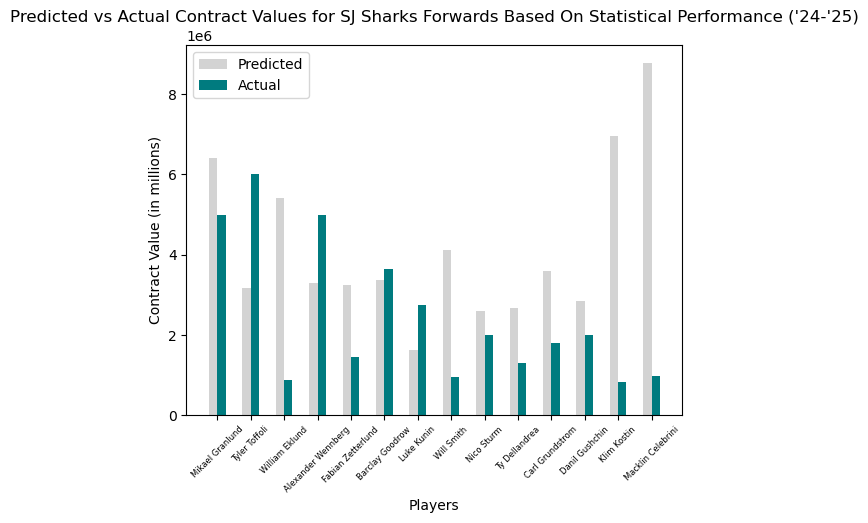

In [8]:
#Build the split bar-chart
players = sharks_data_2425.index
x = np.arange(len(players))
bar_width = 0.25
fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, predictions, bar_width, label='Predicted', color='lightgray')
bars2 = ax.bar(x + bar_width/2, y_2425, bar_width, label='Actual', color='#007B7F')
ax.set_xlabel('Players')
ax.set_ylabel('Contract Value (in millions)')
ax.set_title('Predicted vs Actual Contract Values for SJ Sharks Forwards Based On Statistical Performance (\'24-\'25)')
ax.set_xticks(x)
ax.set_xticklabels(players, rotation=45, fontsize = 6)
ax.legend()
plt.show()

After plotting predicted vs. actual total cap hits we can see that, as of 10/21/24, 10 out of the 14 qualifying forwards on the '24-'25 Sharks are outperforming their total cap hit on their current contract based on the aforementioned on-ice metrics. This model can be utilized to help in negotiating new contracts with players who have yet to be signed, identify players who's contracts should be traded, and evaluated the performance of the front office.